# 0: Install Dependencies

In [1]:
import pandas as pd
import datetime
import numpy as np


# from matplotlib.backends.backend_pgf import FigureCanvasPgf
import matplotlib.pyplot as plt
import matplotlib

import spacy
 
from langdetect import detect
import string
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'


In [3]:
import warnings
warnings.simplefilter("ignore", UserWarning)

In [4]:
# from matplotlib.backends.backend_pgf import FigureCanvasPgf
# matplotlib.use("pgf")
# matplotlib.rcParams.update({
#     "pgf.texsystem": "pdflatex",
#     'font.family': 'serif',
#     'text.usetex': True,
#     'pgf.rcfonts': False,
# })

In [5]:
#https://realpython.com/sentiment-analysis-python/

In [6]:
# nltk dependency
# python -m nltk.downloader all

# 1: Preprocessing 

## 1.1: Load Raw Data

In [7]:
training_df = pd.read_csv('train.csv', header=None, names=['Rating', 'Title', 'Review'])
testing_df = pd.read_csv('test.csv', header=None, names=['Rating', 'Title', 'Review'])

### 1.1.5: Remove Non-English Reviews

## TODO
    - Try to get this to work

In [8]:
print("Language: ", detect('Hello, simple english review because I like reviewing products in english!'))
print("Language: ", detect('Avez-vous déjà vu un CD double et un DVD avec'))

Language:  en
Language:  fr


In [9]:
training_df['Language'] = detect(str(training_df['Review']))
testing_df['Language'] = detect(str(testing_df['Review']))

In [10]:
# training_df.head()

In [11]:
# testing_df.head()

In [12]:
non_english_mask = (training_df['Language'] == 'en')
training_df = training_df[non_english_mask]

non_english_mast = (testing_df['Language'] == 'en')
testing_df = testing_df[non_english_mask]

In [13]:
training_df['Language'].unique()

array(['en'], dtype=object)

In [14]:
testing_df['Language'].unique()

array(['en'], dtype=object)

In [15]:
len(training_df)

3000000

In [16]:
len(testing_df)

650000

Evaluate Rating Distribution

In [17]:
print(training_df['Rating'].unique())

[3 5 4 1 2]


In [18]:
# import pdflatex
from matplotlib.backends import backend_pgf
# matplotlib.use('pgf')
# plt.rc('pgf', texsystem='pdflatex')

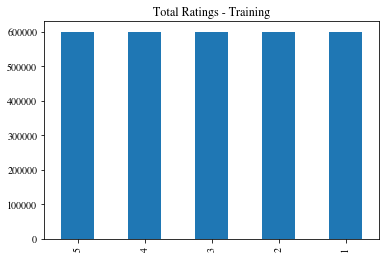

In [19]:
plt.title('Total Ratings - Training')
training_df['Rating'].value_counts().plot.bar()
# plt.savefig('Ratings Distribution.png')
# plt.savefig('Ratings Distribution.pgf', format = 'pgf')
# plt.savefig('Ratings Distribution.pdf')


# import tikzplotlib
# tikzplotlib.save("Ratings Distribution.tex")

plt.show()

In [20]:
# testing_df['Rating'].value_counts().plot.bar()
# plt.show()

Evaluate Length of Reviews

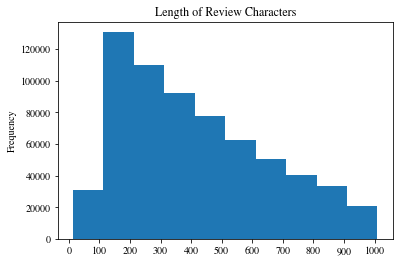

In [21]:
plt.title("Length of Review Characters")
testing_df['Review'].str.len().plot.hist(bins = 10)
plt.xticks(np.linspace(0, 1000, 11))
# plt.savefig('Review Length Hist.png')
# plt.savefig('Review Length Hist.pdf')
plt.show()

# 1.2: Tokenization (sentence vs word tokenization)
- Tokenize each element in 'review' column
- Filter out symbols
- Filter out stop words

In [22]:
def remove_punc(text):
    result_text = text.translate(str.maketrans('', '', string.punctuation))
    return result_text

s = r'This model may be ok for sedentary types, but I\'m active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! '
remove_punc(s)

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking 2030 stock 114622 Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [23]:
def remove_nums(text):
    result_text = ''.join([i for i in text if not i.isdigit()])
    return result_text

remove_nums(remove_punc(s))

'This model may be ok for sedentary types but Im active and get around alot in my job  consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking  stock  Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [24]:
import re
def remove_spaces(text):
    result_text = re.sub(' +', ' ', text)
    return result_text

remove_spaces(remove_nums(remove_punc(s)))

'This model may be ok for sedentary types but Im active and get around alot in my job consistently found these stockings rolled up down by my ankles Not Good Solution go with the standard compression stocking stock Excellent support stays up and gives me what I need Both pair of these also tore as I struggled to pull them up all the time Good riddancebad investment '

In [25]:
remove_spaces(remove_nums(remove_punc(s))).lower()

'this model may be ok for sedentary types but im active and get around alot in my job consistently found these stockings rolled up down by my ankles not good solution go with the standard compression stocking stock excellent support stays up and gives me what i need both pair of these also tore as i struggled to pull them up all the time good riddancebad investment '

In [26]:
def remove_stop_words(text):

    r_start_time = datetime.datetime.now()
    
    nlp = spacy.load('en_core_web_sm')
    text_list = nlp(text)
    
#     stop_list = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 'is', 'it', 'no', 'not',
#                  'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'there', 'these', 'they', 'this', 'to', 'was', 
#                  'will', 'with']
    
    temp_list = []
    for token in text_list:
        if not token.is_stop:
            temp_list.append(token)
    
    str_output = ' '.join([str(elem) for elem in temp_list])

    r_end_time = datetime.datetime.now()
#     print('remove_stop_words runtime: ', r_end_time - r_start_time)
    
    return str_output    
    
remove_stop_words(remove_spaces(remove_nums(remove_punc(s))).lower())

'model ok sedentary types m active alot job consistently found stockings rolled ankles good solution standard compression stocking stock excellent support stays gives need pair tore struggled pull time good riddancebad investment'

In [27]:
def remove_stop_words_nltk(text):
#     r_start_time = datetime.datetime.now()
    
    all_stopwords = stopwords.words('english')
    all_stopwords.append('play')

    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word in all_stopwords]
#     str_output = ' '.join([str(elem) for elem in tokens_without_sw]) #Working

    # Maybe not working 
    str_output = ' '.join([str(elem) for elem in tokens_without_sw if not len(elem) < 2])
    
    
    
#     r_end_time = datetime.datetime.now()
#     print('\n Runtime: ', r_end_time - r_start_time)
    
#     print(str_output)
    return(str_output)
    
# remove_stop_words_nltk(s)

# 1.3: Normalization (Root Word Extraction)
- Stemming vs Lemmatization
- Normalize each element in 'reviews' 

In [28]:



lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize_sentence_simple(sentence):
    
    temp_list = []
    for word in nltk.word_tokenize(sentence):
        temp_list.append(lemmatizer.lemmatize(word))
        
    
    return ' '.join([str(elem) for elem in temp_list])


def lemmatize_sentence_pos(sentence):
    
    temp_list = []
    for word in nltk.word_tokenize(sentence):
        temp_list.append(lemmatizer.lemmatize(word, get_wordnet_pos(word)))
#         temp_list.append(lemmatizer.lemmatize(word))
        
    
    return ' '.join([str(elem) for elem in temp_list])




word = 'feet'
# print(lemmatizer.lemmatize(word, get_wordnet_pos(word)))


sentence = "The striped bats are hanging on their feet"

print("Before Lemmatization:       ", sentence)
print("\nAfter Simple Lemmatization: ", lemmatize_sentence_simple(sentence))
print("\nAfter POS Lemmatization:    ", lemmatize_sentence_pos(sentence))

Before Lemmatization:        The striped bats are hanging on their feet

After Simple Lemmatization:  The striped bat are hanging on their foot

After POS Lemmatization:     The strip bat be hang on their foot


In [29]:
%%time
# Parsing

def process_column(unprocessed_list, total_items):
    output_list = []
    count = 0
    for item in unprocessed_list:
        if item != ' ':            
            #No Lemma
#             output_list.append( remove_nums(remove_punc(remove_stop_words_nltk(item))).lower()  )


            #Simple
            output_list.append( remove_nums(remove_punc(lemmatize_sentence_simple(remove_stop_words_nltk(item)))).lower()  )

        
            #POS
#             output_list.append( remove_nums(remove_punc(lemmatize_sentence_pos(remove_stop_words_nltk(item)))).lower()  )
        
        else:
            output_list.append(' ')
        
        count += 1
        
        if count % 10000 == 0:
            print("{:.2%}".format(count / total_items))
        
    return output_list


start_time = datetime.datetime.now()



total_items = 300000
test_raw_reviews = testing_df['Review'].tolist()
test_processed_reviews = process_column(test_raw_reviews[:total_items], total_items)



end_time = datetime.datetime.now()
# print("POS Lemma, total items: ", total_items, "\nRuntime: ", end_time - start_time)
# print('with POS lemma: 0:01:17.570621')
# print('Lemma W/o POS: ')

3.33%
6.67%
10.00%
13.33%
16.67%
20.00%
23.33%
26.67%
30.00%
33.33%
36.67%
40.00%
43.33%
46.67%
50.00%
53.33%
56.67%
60.00%
63.33%
66.67%
70.00%
73.33%
76.67%
80.00%
83.33%
86.67%
90.00%
93.33%
96.67%
100.00%
Wall time: 9min


In [30]:
%%time
# tokenized_test_processed_reviews = [list(filter(lambda x: len(x) > 1, document)) for document in test_processed_reviews]

from nltk.tokenize import word_tokenize
tokenized_test_processed_reviews = []
for doc in test_processed_reviews:
    tokenized_test_processed_reviews.append(word_tokenize(doc))

Wall time: 1min 15s


In [31]:
print('---------- Review 1 ----------')
print('Raw: ', test_raw_reviews[0], '\n\n')
print('Processed: ', test_processed_reviews[0])
print('\n')
print('---------- Review 2 ----------')
print('Raw: ', test_raw_reviews[2], '\n\n')
print('Processed: ', test_processed_reviews[2])

---------- Review 1 ----------
Raw:  This model may be ok for sedentary types, but I'm active and get around alot in my job - consistently found these stockings rolled up down by my ankles! Not Good!! Solution: go with the standard compression stocking, 20-30, stock #114622. Excellent support, stays up and gives me what I need. Both pair of these also tore as I struggled to pull them up all the time. Good riddance/bad investment! 


Processed:  this model may ok sedentary type m active get around alot job consistently found stocking rolled ankle not good solution go standard compression stocking  stock  excellent support stay give need both pair also tore struggled pull time good riddancebad investment


---------- Review 2 ----------
Raw:  I bought one of these chargers..the instructions say the lights stay on while the battery charges...true. The instructions doNT say the lights turn off when its done. Which is also true. 24 hours of charging and the lights stay on. I returned it thi

# 2: Vectorization
- Vectorize each token of 'reviews' 
- Save vectorized reviews data

In [32]:
sample_df = pd.DataFrame()
sample_df['Targets'] = testing_df['Rating'].tolist()[:total_items]
sample_df['Processed Text'] = test_processed_reviews
print("only first", total_items, "samples of validation data")
sample_df.head()

only first 300000 samples of validation data


,Targets,Processed Text
0,1,this model may ok sedentary type m active get ...
1,4,this fast read filled unexpected humour profou...
2,2,bought one chargersthe instruction say light s...
3,2,excited find book ostensibly muslim feminism v...
4,2,big jvc fan like model suspiscious saw several...


Gensim Word2Vec

In [33]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized_test_processed_reviews, window = context_size, min_count = min_word)

Wall time: 1min 47s


In [34]:
word_vec.wv.vectors

array([[ 0.04484448,  1.2438867 ,  0.627643  , ..., -0.54987466,
         1.2503394 ,  1.707205  ],
       [-2.821979  ,  1.4604212 , -0.05182079, ...,  0.890775  ,
        -2.3897157 ,  2.659595  ],
       [-0.3529121 ,  3.4988892 ,  1.9100258 , ..., -1.1311826 ,
         1.8933047 , -1.7715224 ],
       ...,
       [-0.02807735,  0.05268098,  0.02409236, ..., -0.05166391,
        -0.01782141,  0.03205235],
       [-0.0401679 ,  0.06618406,  0.02759699, ..., -0.06457938,
        -0.02519818,  0.04905988],
       [ 0.05756871,  0.00289253,  0.001464  , ..., -0.03372742,
        -0.00437568,  0.02217681]], dtype=float32)

In [35]:
word_vec_df = pd.DataFrame(word_vec.wv.vectors, index= word_vec.wv.index_to_key)

display(word_vec_df.head())

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
s,0.044844,1.243887,0.627643,2.210887,1.953139,3.358353,2.355853,2.215579,0.057515,0.273206,...,0.469904,0.070242,0.560966,0.326869,0.483059,-1.061983,-1.517684,-0.549875,1.250339,1.707205
book,-2.821979,1.460421,-0.051821,4.951419,5.105778,-3.496820,-2.384452,0.325842,-1.249351,-3.221055,...,-1.344457,-0.546418,4.503329,0.940096,-0.758670,-1.174764,3.289161,0.890775,-2.389716,2.659595
the,-0.352912,3.498889,1.910026,-0.046321,0.186846,2.337099,-2.290996,2.862715,2.004858,1.254121,...,0.020948,-0.374582,0.253494,-0.168774,-2.251514,1.514446,-1.513568,-1.131183,1.893305,-1.771522
nt,-3.254736,3.867960,-0.252543,5.231812,1.413649,0.614495,-0.941885,0.449375,1.805213,2.373670,...,-3.570028,-5.402641,-0.562794,1.966479,1.505659,-3.209986,1.457039,-2.610500,-1.554656,-0.346315
one,-0.343731,0.190942,-0.190563,0.290132,-0.139181,1.138931,-2.227344,3.052621,-1.792296,-0.227356,...,1.384538,-3.003447,1.526671,-1.437287,-0.263723,-2.575004,-1.932705,1.600246,1.086938,1.822513


In [36]:
%%time
tokenized_array = np.array(tokenized_test_processed_reviews)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

Wall time: 3min 41s


In [37]:
model_df = pd.DataFrame(model_array)
model_df["Targets"] = sample_df["Targets"]

model_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,Targets
0,-0.641449,1.143364,0.254346,0.338410,0.230379,0.642534,-0.723454,0.026929,0.142740,0.082440,...,-0.863451,-0.208217,-0.756408,0.174320,0.053941,0.101426,0.005719,0.020066,0.009232,1
1,-0.015012,0.852366,0.035829,-0.225933,1.107216,-1.264626,0.661152,1.074308,0.090731,-2.026044,...,0.697520,0.550685,0.907980,0.870545,-0.020566,-0.024440,-0.087835,-0.002819,0.382641,4
2,-1.361268,1.667635,0.080353,-0.021510,-0.784869,-1.047745,-0.147985,0.574432,0.406933,1.241578,...,-1.428751,-0.585887,-0.536496,-0.039325,-0.009230,0.064585,-0.107795,1.089768,1.044646,2
3,-0.146818,0.286037,0.659895,0.418763,0.684480,-0.351201,-0.321191,0.918262,-0.223338,-0.540295,...,-1.127338,0.876599,0.122264,0.186945,0.334065,-0.362565,-0.009713,-0.229069,-0.146436,2
4,-1.148019,0.875126,-0.515554,0.739369,-0.726676,0.236998,-0.087368,0.189872,-0.351916,0.218884,...,-1.386833,-0.270273,-0.261253,-0.354267,0.419798,-1.037852,-0.223329,0.949568,0.347336,2


In [38]:
word_bank = ["iphone", "computer", "tv", "durable", "price", "terrible", "fantastic"]

for word in word_bank[:]:
    related_vec = word_vec.wv.most_similar(word, topn=5)
    related_words = np.array(related_vec)[:,0]
    word_bank.extend(related_words)
    print(f"{word}: {related_words}")

iphone: ['dock' 'treo' 'ipods' 'bluetooth' 'nano']
computer: ['pc' 'software' 'windows' 'xp' 'desktop']
tv: ['television' 'channel' 'hbo' 'dvr' 'broadcast']
durable: ['sturdy' 'durability' 'lightweight' 'flimsy' 'functional']
price: ['priced' 'cost' 'pricei' 'inexpensive' 'shipping']
terrible: ['horrible' 'awful' 'horrid' 'lousy' 'horrendous']
fantastic: ['amazing' 'incredible' 'terrific' 'wonderful' 'fabulous']


In [45]:
model_df.shape

(300000, 101)

In [46]:
#Drop NA's
print(f"Original 'model_df' count: {len(model_df)}")
print(f"Final 'model_df' count: {len(model_df.dropna(axis=0))}")

model_df = model_df.dropna(axis=0)

Original 'model_df' count: 300000
Final 'model_df' count: 299999


Keras Tokenizer 

In [131]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# tokenizer = Tokenizer(num_words=5000, split=" ")
# tokenizer.fit_on_texts(sample_df['Processed Text'].values)

# X = tokenizer.texts_to_sequences(sample_df['Processed Text'].values)
# X = pad_sequences(X) # padding text vector so they all have the same length

# y = sample_df['Targets'].tolist()

In [47]:
y = pd.get_dummies(sample_df['Targets']).values
# [print(sample_df['Targets'][i], y[i]) for i in range(0,15)]
y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [48]:
# y

In [49]:
y_values = np.argmax(y, axis=1)
y_values

array([0, 3, 1, ..., 4, 4, 4], dtype=int64)

***

# 3: Model Selection

# 4: Classification

- 
    #### 5.1
    - Split into training/test sets
    - Likely 80/20
- 
    #### 5.2
    - Model selection
- 
    #### 5.3
    - Train model
- 
    #### 5.4
    - Evaluate performance
- 
    #### 5.5
    - Tweak parameters
    - Potentially include hyperparameters
- 
    #### 5.6
    - Generate predictions
    - Vector from (-1.0, 1.0)

Dimensionality Reduction to Detect Linear Seperability, Principal Component Analysis Technique Used

In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca = pca.fit_transform(model_df)
pca

array([[ 2.32539203, -1.31732781],
       [-4.59659534, -1.13198937],
       [ 3.37767117, -1.16545197],
       ...,
       [ 3.66837185, -0.67591391],
       [-2.02646862, -3.78112355],
       [ 0.45039467, -0.32076783]])

In [55]:
# sample_df['PCA_1'] = pca.T[0]
# sample_df['PCA_2'] = pca.T[1]
# sample_df.head()

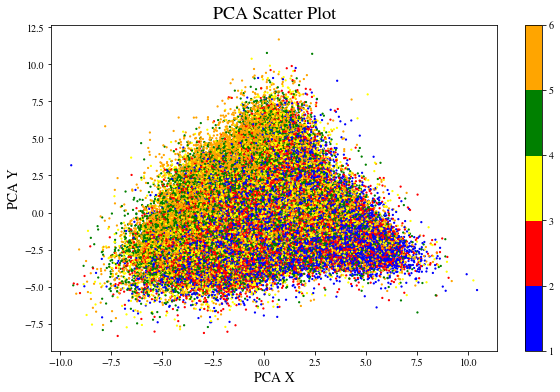

In [54]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

plot_colors = model_df["Targets"].map({1:"blue", 2:"red", 3:"yellow", 4:"green", 5:"orange"})
cmap = matplotlib.colors.ListedColormap(['blue','red','yellow', 'green', 'orange'])
c_norm = matplotlib.colors.BoundaryNorm(boundaries=[1,2,3,4,5,6], ncolors=5)


fig, ax = plt.subplots(figsize = (10, 6))
cax = ax.scatter(pca.T[0], pca.T[1], c = model_df["Targets"].values,  s=1.5, cmap=cmap, norm=c_norm)
fig.colorbar(cax)

ax.set(title = "PCA Scatter Plot", xlabel = 'PCA X', ylabel = 'PCA Y')
ax.title.set_fontsize(18)
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)

fig.savefig("PCA Scatter Plot.png", dpi = 300)

plt.show()

In [56]:
#Gensim Data
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

In [57]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
74891,0.381284,1.034992,0.549486,-0.252019,0.428671,-0.848462,-0.572619,2.602850,0.644168,-1.584531,...,0.396924,-0.920995,0.832734,-0.207533,-0.411835,-1.746161,0.735918,0.534315,0.414841,-1.234168
126887,-0.573089,1.042446,-0.010027,0.400111,0.461785,0.858279,0.517605,0.229007,-0.626261,0.250053,...,0.979358,-1.175300,-0.597361,-0.443311,-0.441953,0.236464,-0.607854,0.165782,-0.351409,0.443230
114724,-1.152001,0.956840,-0.136207,1.511028,1.048650,-0.114689,-0.905941,0.784360,-0.655787,-1.497269,...,-0.373230,-0.719766,0.488728,0.186802,-0.692409,0.019313,0.348741,-0.593697,0.237002,-0.078815
141270,0.205829,0.721325,1.099875,0.942174,-0.112853,0.355985,-0.492429,0.941006,-0.272353,-0.120173,...,-0.063049,-0.590093,-0.459690,0.973265,0.289630,0.221416,0.546211,-0.748901,0.480828,-1.007419
295194,-1.456090,2.438228,1.636042,0.726173,-2.506249,0.728848,-1.214384,-0.249545,0.145871,0.732098,...,-1.380569,-2.212698,-1.961355,-0.535398,-0.048051,0.127086,-1.030305,-1.259745,0.434837,-0.420814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119880,-1.615650,1.272740,-0.450966,1.050403,-0.047740,-0.227683,-0.834029,-0.764680,-0.527134,-0.230212,...,0.553939,-1.336433,0.441543,-0.376057,-0.108308,-1.009397,0.295209,-0.201620,0.620149,0.967295
259179,-0.257754,1.166221,0.733657,0.720555,0.299150,-0.123265,-0.828442,0.335867,0.492754,-0.646546,...,0.069562,-1.175779,0.016000,0.502527,0.205610,-0.688625,-0.033616,-0.026580,0.323358,-0.453320
131933,0.161110,1.239099,0.947235,1.147208,-0.029712,0.226145,0.785278,1.314388,-1.138183,-0.206874,...,0.753248,-1.251097,-0.738250,0.170846,-0.053710,-1.152483,-0.498299,-0.672120,0.884352,-0.382473
146868,-0.883461,1.357013,-0.218432,0.706551,-0.066096,-0.107997,-1.330876,0.354473,-0.326314,-0.152721,...,-0.136466,-0.749109,-0.541874,0.262736,0.716847,0.762879,-0.756585,-0.359773,1.052630,0.000537


In [58]:
# This is not required for Gensim vectorization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
# X_train_scaled


In [59]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)
# X_test_scaled

In [60]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(194999, 100) (194999,) (105000, 100) (105000,)


In [61]:
%%time
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 50, class_weight= None, criterion="entropy", random_state=42)

history = forest.fit(X_train, y_train)

Wall time: 6min 4s


In [62]:
from sklearn import metrics

y_pred_train = forest.predict(X_train)

train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
train_f1_score = metrics.f1_score(y_train, y_pred_train, average="micro")

train_precision = metrics.precision_score(y_train, y_pred_train, average = 'micro')
train_recall = metrics.recall_score(y_train, y_pred_train, average = 'micro')

print(f"Training Set Accuracy: {train_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {train_f1_score:.3f}")
# print(f"Training Set Precision: {train_precision:.3f}")
# print(f"Training Set Recall: {train_recall:.3f}")

Training Set Accuracy: 99.999%
Training Set F1 Score: 1.000


In [63]:
y_pred_test = forest.predict(X_test)

test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
test_f1_score = metrics.f1_score(y_test, y_pred_test, average="micro")

test_precision = metrics.precision_score(y_test, y_pred_test, average = 'micro')
test_recall = metrics.recall_score(y_test, y_pred_test, average = 'micro')

print(f"Testing Set Accuracy: {test_accuracy*100:.3f}%")
print(f"Testing Set F1 Score: {test_f1_score:.3f}")
# print(f"Testing Set Precision: {test_precision:.3f}")
# print(f"Testing Set Recall: {test_recall:.3f}")

Testing Set Accuracy: 41.276%
Testing Set F1 Score: 0.413


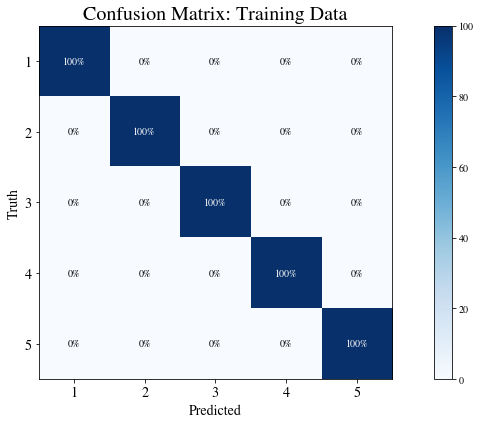

In [64]:
from sklearn.metrics import confusion_matrix

confusion_training = confusion_matrix(y_train, y_pred_train)

confusion_training = confusion_training.astype("float") / confusion_training.sum(axis=1)[:, np.newaxis]

confusion_training = np.around(confusion_training, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(12,6))
im = axes.imshow(confusion_training, interpolation="nearest", cmap = plt.cm.Blues)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix: Training Data", \
         xticks=np.arange(confusion_training.shape[1]), \
         yticks=np.arange(confusion_training.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14)
axes.title.set_fontsize(20)
axes.xaxis.label.set_fontsize(14)
axes.yaxis.label.set_fontsize(14)


#add clear annotations to the confusion matrix
threshold = confusion_training.max()/1.5
for i in range(confusion_training.shape[0]):
    for j in range(confusion_training.shape[1]):
        axes.text(j, i, f"{confusion_training[i, j]:.0f}%",
                ha="center", va="center",
                color="white" if confusion_training[i, j] > threshold else "black")
        
f.tight_layout()
plt.savefig('Random Forest Training Confusion.png', dpi = 300)
plt.show()

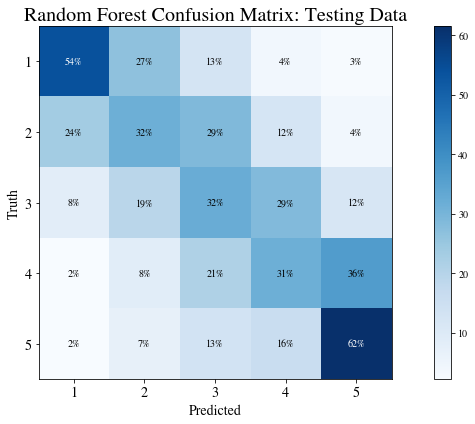

In [110]:
confusion_training = confusion_matrix(y_test, y_pred_test)

confusion_training = confusion_training.astype("float") / confusion_training.sum(axis=1)[:, np.newaxis]

confusion_training = np.around(confusion_training, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(12,6))
im = axes.imshow(confusion_training, interpolation="nearest", cmap = plt.cm.Blues)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix: Testing Data", \
         xticks=np.arange(confusion_training.shape[1]), \
         yticks=np.arange(confusion_training.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14)
axes.title.set_fontsize(20)
axes.xaxis.label.set_fontsize(14)
axes.yaxis.label.set_fontsize(14)


#add clear annotations to the confusion matrix
threshold = confusion_training.max()/1.5
for i in range(confusion_training.shape[0]):
    for j in range(confusion_training.shape[1]):
        axes.text(j, i, f"{confusion_training[i, j]:.0f}%",
                ha="center", va="center",
                color="white" if confusion_training[i, j] > threshold else "black")
        
f.tight_layout()
plt.savefig('Random Forest Testing Confusion.png', dpi = 300)
plt.show()

In [66]:
%%time
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, cv=3, scoring="f1_micro")

print(cross_val_accuracy)
print(cross_val_f1)

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")


Wall time: 22min 28s


ANN MLP Model

In [70]:
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout

In [71]:

# model = Sequential()
# model.add(Embedding(5000, 256, input_length=X.shape[1]))
# model.add(Dropout(0.3))
# model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
# model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
# model.add(Dense(5, activation='softmax'))


# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# model.summary()

In [72]:
# batch_size = 64
# epochs = 4

# history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size, verbose=1)

In [73]:
# y = pd.get_dummies(model_df['Targets']).values
# # [print(sample_df['Targets'][i], y[i]) for i in range(0,15)]
# y

array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [92]:
y = np.argmax(y, axis=1)

In [93]:
from sklearn.model_selection import train_test_split

#use y_values for sparse and y for regualrd

# X_train, X_test, y_train, y_test = train_test_split(np.array([sample_df['PCA_1'], sample_df['PCA_2']]).T, sample_df['Targets'], test_size=0.2, random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 30 )

In [95]:
import tensorflow.keras as keras

lambda_regularization = 0.0001
dropout_rt = 0.1

learning_rt = 0.01

model = Sequential()

model.add(Dense(512, input_dim = X.shape[1] ))
# model.add(Dropout(0.3))
model.add(Dense(248, activation='relu', kernel_regularizer = keras.regularizers.l2(lambda_regularization)))
model.add(Dense(128, activation='relu', kernel_regularizer = keras.regularizers.l2(lambda_regularization)))
model.add(Dense(64, activation='relu', kernel_regularizer = keras.regularizers.l2(lambda_regularization)))
model.add(Dense(32, activation='softmax', kernel_regularizer = keras.regularizers.l2(lambda_regularization)))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer = keras.optimizers.Adam(learning_rate = learning_rt),
              loss= 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

print(learning_rt, dropout_rt, lambda_regularization)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 50)


Epoch 1/50
6563/6563 [==============================] - 15s 2ms/step - loss: 1.6164 - accuracy: 0.2051 - val_loss: 1.6268 - val_accuracy: 0.1987
Epoch 2/50
6563/6563 [==============================] - 14s 2ms/step - loss: 1.6170 - accuracy: 0.2013 - val_loss: 1.6132 - val_accuracy: 0.1987
Epoch 3/50
6563/6563 [==============================] - 16s 2ms/step - loss: 1.5944 - accuracy: 0.2338 - val_loss: 1.6298 - val_accuracy: 0.2071
Epoch 4/50
6563/6563 [==============================] - 13s 2ms/step - loss: 1.5869 - accuracy: 0.2494 - val_loss: 1.6313 - val_accuracy: 0.1987
Epoch 5/50
6563/6563 [==============================] - 13s 2ms/step - loss: 1.6073 - accuracy: 0.2164 - val_loss: 1.5573 - val_accuracy: 0.2746
Epoch 6/50
6563/6563 [==============================] - 13s 2ms/step - loss: 1.5448 - accuracy: 0.2870 - val_loss: 1.5398 - val_accuracy: 0.2976
Epoch 7/50
6563/6563 [==============================] - 14s 2ms/step - loss: 1.5300 - accuracy: 0.3051 - val_loss: 1.5166 - val_ac

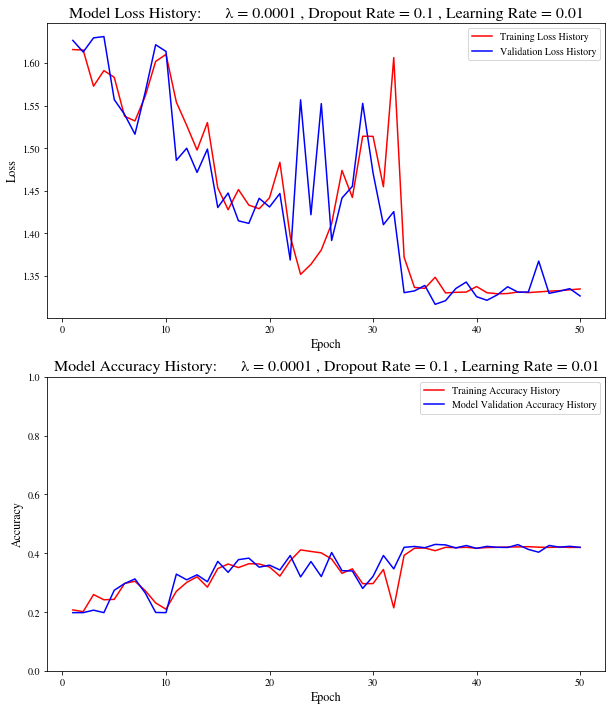

In [102]:
model_loss_history = history.history['loss']
model_val_loss_history = history.history['val_loss']
model_accuracy_list = history.history['accuracy']
model_val_accuracy_list = history.history['val_accuracy']


parameter_string = '     λ = ' + str(lambda_regularization) + ' , Dropout Rate = ' + str(dropout_rt) + ' , Learning Rate = '+ str(learning_rt)
file_save_string = 'lambda_' + str(lambda_regularization) + ' - dropout_rt_' + str(dropout_rt) + '.png'


plt.figure(figsize = (10,8))

plt.subplot(2,1,1)
plt.title('Model Loss History: ' + parameter_string, fontsize = 16)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Loss', fontsize = 12)
# plt.ylim(0, 150)
plt.plot(np.arange(1, len(model_loss_history) + 1), model_loss_history, color = 'r', label = 'Training Loss History')
plt.plot(np.arange(1, len(model_val_loss_history) + 1), model_val_loss_history, color = 'b', label = 'Validation Loss History')
plt.legend()


plt.subplot(2,1,2)
plt.title('Model Accuracy History: ' + parameter_string, fontsize = 16)
plt.xlabel('Epoch', fontsize = 12)
plt.ylabel('Accuracy', fontsize = 12)
plt.ylim(0, 1.0)
plt.plot(np.arange(1, len(model_accuracy_list) + 1), model_accuracy_list, color = 'r', label = 'Training Accuracy History')
plt.plot(np.arange(1, len(model_val_accuracy_list) + 1), model_val_accuracy_list, color = 'b', label = 'Model Validation Accuracy History')
plt.legend()
plt.subplots_adjust(top = 1.25)
# plt.savefig(file_save_string, dpi=300, orientation = 'vertical', bbox_inches = 'tight', pad_inches = 0.5)

plt.show()

In [107]:
from sklearn import metrics

y_pred_train = np.argmax(model.predict(X_train), axis = 1)

train_accuracy = metrics.accuracy_score(y_train, y_pred_train)
train_f1_score = metrics.f1_score(y_train, y_pred_train, average="micro")

train_precision = metrics.precision_score(y_train, y_pred_train, average = 'micro')
train_recall = metrics.recall_score(y_train, y_pred_train, average = 'micro')

print(f"Training Set Accuracy: {train_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {train_f1_score:.3f}")
# print(f"Training Set Precision: {train_precision:.3f}")
# print(f"Training Set Recall: {train_recall:.3f}")

Training Set Accuracy: 42.293%
Training Set F1 Score: 0.423


In [108]:
y_pred_test = np.argmax(model.predict(X_test), axis = 1)

test_accuracy = metrics.accuracy_score(y_test, y_pred_test)
test_f1_score = metrics.f1_score(y_test, y_pred_test, average="micro")

test_precision = metrics.precision_score(y_test, y_pred_test, average = 'micro')
test_recall = metrics.recall_score(y_test, y_pred_test, average = 'micro')

print(f"Testing Set Accuracy: {test_accuracy*100:.3f}%")
print(f"Testing Set F1 Score: {test_f1_score:.3f}")
# print(f"Testing Set Precision: {test_precision:.3f}")
# print(f"Testing Set Recall: {test_recall:.3f}")

Testing Set Accuracy: 42.019%
Testing Set F1 Score: 0.420


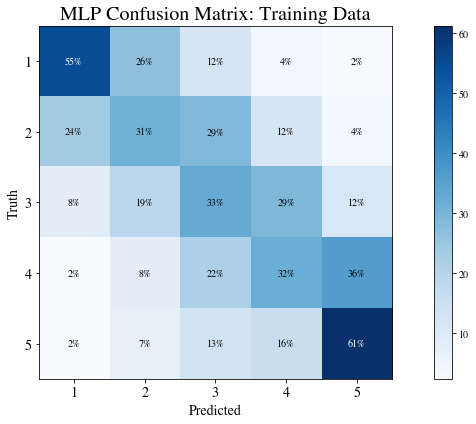

In [111]:
from sklearn.metrics import confusion_matrix

confusion_training = confusion_matrix(y_train, y_pred_train)

confusion_training = confusion_training.astype("float") / confusion_training.sum(axis=1)[:, np.newaxis]

confusion_training = np.around(confusion_training, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(12,6))
im = axes.imshow(confusion_training, interpolation="nearest", cmap = plt.cm.Blues)

axes.figure.colorbar(im, ax=axes)
axes.set(title="MLP Confusion Matrix: Training Data", \
         xticks=np.arange(confusion_training.shape[1]), \
         yticks=np.arange(confusion_training.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14)
axes.title.set_fontsize(20)
axes.xaxis.label.set_fontsize(14)
axes.yaxis.label.set_fontsize(14)


#add clear annotations to the confusion matrix
threshold = confusion_training.max()/1.5
for i in range(confusion_training.shape[0]):
    for j in range(confusion_training.shape[1]):
        axes.text(j, i, f"{confusion_training[i, j]:.0f}%",
                ha="center", va="center",
                color="white" if confusion_training[i, j] > threshold else "black")
        
f.tight_layout()
plt.savefig('MLP Training Confusion.png', dpi = 300)
plt.show()

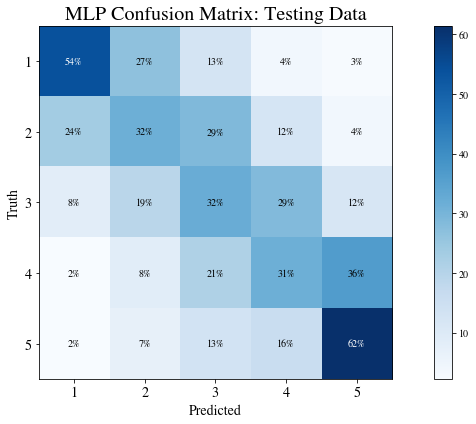

In [112]:
confusion_training = confusion_matrix(y_test, y_pred_test)

confusion_training = confusion_training.astype("float") / confusion_training.sum(axis=1)[:, np.newaxis]

confusion_training = np.around(confusion_training, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(12,6))
im = axes.imshow(confusion_training, interpolation="nearest", cmap = plt.cm.Blues)

axes.figure.colorbar(im, ax=axes)
axes.set(title="MLP Confusion Matrix: Testing Data", \
         xticks=np.arange(confusion_training.shape[1]), \
         yticks=np.arange(confusion_training.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

axes.tick_params(axis='x', labelsize=14)
axes.tick_params(axis='y', labelsize=14)
axes.title.set_fontsize(20)
axes.xaxis.label.set_fontsize(14)
axes.yaxis.label.set_fontsize(14)


#add clear annotations to the confusion matrix
threshold = confusion_training.max()/1.5
for i in range(confusion_training.shape[0]):
    for j in range(confusion_training.shape[1]):
        axes.text(j, i, f"{confusion_training[i, j]:.0f}%",
                ha="center", va="center",
                color="white" if confusion_training[i, j] > threshold else "black")
        
f.tight_layout()
plt.savefig('MLP Testing Confusion.png', dpi = 300)
plt.show()

In [77]:
# "{:.2%}".format(predictions[i])

In [121]:
list(pd.get_dummies(y_test).values[0])

[0, 0, 0, 1, 0]

In [122]:
predictions = model.predict(X_test)

[print('Text: ', sample_df['Processed Text'][i], 
       '\nPredicted Output: ', predictions[i],
       '\nTrue Classification: ', list(pd.get_dummies(y_test).values[i]), #y_test[i],
       '\n\n') for i in range(0, 10)]

Text:  this model may ok sedentary type m active get around alot job consistently found stocking rolled ankle not good solution go standard compression stocking  stock  excellent support stay give need both pair also tore struggled pull time good riddancebad investment 
Predicted Output:  [0.0811201  0.19121327 0.29904997 0.28084123 0.14777537] 
True Classification:  [0, 0, 0, 1, 0] 


Text:  this fast read filled unexpected humour profound insight art politics policy in brief sly wry wise 
Predicted Output:  [0.16745722 0.28412092 0.26716793 0.17133997 0.10991394] 
True Classification:  [0, 1, 0, 0, 0] 


Text:  bought one chargersthe instruction say light stay battery charge  true the instruction dont say light turn done which also true  hour charging light stay returned thinking bad unitthe new one thing kept since charge  light useless since seem always stay it s  backup  charger manage drain aas would nt want charger 
Predicted Output:  [0.02365395 0.04889715 0.0905285  0.29860127

[None, None, None, None, None, None, None, None, None, None]

In [123]:
predictions

array([[0.0811201 , 0.19121327, 0.29904997, 0.28084123, 0.14777537],
       [0.16745722, 0.28412092, 0.26716793, 0.17133997, 0.10991394],
       [0.02365395, 0.04889715, 0.0905285 , 0.29860127, 0.5383191 ],
       ...,
       [0.02365399, 0.04889725, 0.09052871, 0.2986015 , 0.5383186 ],
       [0.60297716, 0.25992388, 0.0861928 , 0.02807318, 0.02283295],
       [0.60297716, 0.25992388, 0.0861928 , 0.02807318, 0.02283295]],
      dtype=float32)

## TODO 
    - Other Algos (Random Forest maybe) 
    - Plot Learning Rate vs Loss somehow (look at the repo with the lm model)

# Evaluate with sample review

In [140]:
# dummy_review = 'This is the best water bottle I have ever used. I love that it is BPA free and great on the environment. I think that everyone who is looking for a good water bottle should buy this one, it is absolutley perfect and totally what I am looking for. I love it!'
dummy_review = 'I absolutely love this product, it is everything that I expected. The quality is unbeatable for the price. This product is amazing. I could not recommend this product more! '
# dummy_review = 'The package arrived damaged and the tv was fully broken. Do not buy this product, it is cheap and not made well. The tv is not very bright and makes a loud noise when you turn it on. The screen arrived broken and three days late.'
dummy_review

'I absolutely love this product, it is everything that I expected. The quality is unbeatable for the price. This product is amazing. I could not recommend this product more! '

In [141]:
dummy_processed = [remove_nums(remove_punc(remove_stop_words(dummy_review))).lower()]
dummy_processed

['absolutely love product  expected  quality unbeatable price  product amazing  recommend product ']

In [142]:
# tokenizer.texts_to_sequences(dummy_processed)

In [143]:
#Reshape to correct input size 

tokenizer = Tokenizer(num_words=5000, split=" ")

dummy_vectorized = tokenizer.texts_to_sequences(dummy_processed)
dummy_vectorized = np.concatenate( ( np.zeros((1, (X.shape[1] - len(dummy_vectorized[0]))))[0]  , (dummy_vectorized[0]) )  )
dummy_vectorized = np.asarray(dummy_vectorized)
dummy_vectorized = np.expand_dims(dummy_vectorized, axis = 0)
dummy_vectorized.shape

(1, 100)

In [144]:
dummy_dist = []
for a in model.predict(dummy_vectorized).tolist()[0]:
    dummy_dist.append(a)

dummy_output_data = {1: dummy_dist[0],
                2: dummy_dist[1],
                3: dummy_dist[2],
                4: dummy_dist[3],
                5: dummy_dist[4] }

dummy_df = pd.DataFrame(data = dummy_output_data, index = ['Class Probability']).T
# dummy_df
dummy_dist

[0.39446204900741577,
 0.3623518943786621,
 0.1475537121295929,
 0.050841063261032104,
 0.04479121416807175]

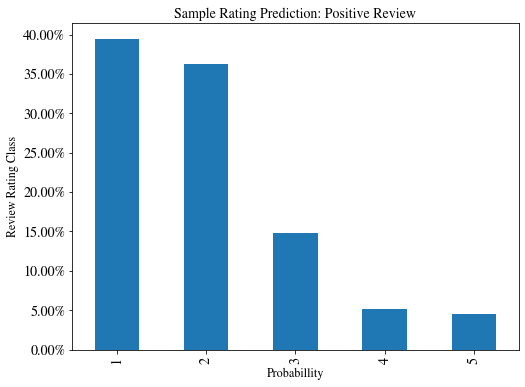

In [145]:
fig, ax = plt.subplots(figsize = (8, 6))

dummy_df['Class Probability'].plot.bar()
ax.set_title('Sample Rating Prediction: Positive Review', fontsize = 14)
ax.set_xlabel('Probabillity', fontsize = 12)
ax.set_ylabel('Review Rating Class', fontsize = 12)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)

vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

# fig.text(0.5, 0.01, dummy_review,  wrap=True, horizontalalignment='center', fontsize=12)
fig.savefig("Sample Ratings Prediction Positive.png", dpi = 300)

plt.show()